# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats

sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [21]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


(array([0.06837607, 0.1025641 , 0.25641026, 0.44444444, 0.51282051,
        0.51282051, 0.25641026, 0.01709402, 0.03418803, 0.01709402]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

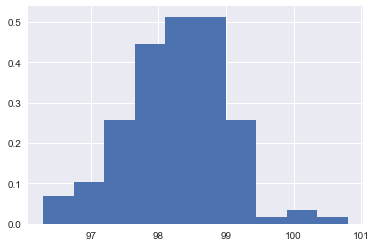

In [4]:
# 1. is the data normally distributed?

plt.hist(df.temperature,bins=10,normed=True)

1. Although the sample data illustrated in the histogram above does not initally appear to be normal (appears to be a right-skewed), we can assume the population's body temperature data is normally distributed as proven by the CLT.

In [5]:
# 2. Is the sample size large? Are the observations independent?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Yes, the sample can be considered large. Also, since each observation represents a person, the observations are naturally independent of one another.

Q3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.

In [41]:
# hypothesis: the true population mean = 98.6
samp_mean = np.mean(df.temperature)

temp_replicates = np.empty(1000)
for i in range(1000):
    new_temps = np.mean(np.random.choice(df.temperature, 130))
    temp_replicates[i] = new_temps
    
conf_temp_reps = np.percentile(temp_replicates, [2.5, 97.5])
print ('95% Confidence Interval in Bootstrap Samples: '+ str(conf_temp_reps))

p = np.sum(temp_replicates == 98.6)/len(temp_replicates)
print 'p-value of '+str(round(p,10))


95% Confidence Interval in Bootstrap Samples: [98.12763462 98.37548077]
p-value of 0.0


Now, let's try frequentist statistical testing. 
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the $t$ or $z$ statistic? 
Now try using the other test. How is the result be different? Why?

- We should use a one-sample test for this, as we are investigating the data within a single sample.
- It would be most appropriate to use a z-statistic because of the sample size.


In [43]:
# calculate SE of sample
sd_sample_dist = np.std(df.temperature) / math.sqrt(df.temperature.size)

#for 95% confidence interval using z test
conf_int_z = (samp_mean-(1.96*sd_sample_dist), samp_mean + (sd_sample_dist*1.96))
print('95% Confidence Interval using z-statistic: '+str(conf_int_z))

95% Confidence Interval using z-statistic: (98.12367980442819, 98.37478173403336)


Using the z-statistic, we can reject our null hypotheis that the true population mean is 98.6 degrees F.

In [44]:
# for 95% confidence interval using t test
conf_int_t = (samp_mean-(1.980*sd_sample_dist), samp_mean + (sd_sample_dist*1.980))
print('95% Confidence Interval using t-statistic: '+str(conf_int_t))


95% Confidence Interval using t-statistic: (98.1223986721343, 98.37606286632726)


<b> We can reject the null hypothesis that the true mean is 98.6 degrees F using either the t-statistic or z-statistic. </b>

Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

In [46]:
ten_samp_mean = np.mean(np.random.choice(df.temperature, 10))
sd_sample_dist_ten = np.std(df.temperature) / math.sqrt(df.temperature.size)

#for 95% confidence interval using z test
conf_int_z = (ten_samp_mean-(1.96*sd_sample_dist_ten), ten_samp_mean + (sd_sample_dist_ten*1.96))
print('95% Confidence Interval using z-statistic: '+str(conf_int_z))

# for 95% confidence interval using t test (9 degrees of freedom)
conf_int_t = (ten_samp_mean-(2.262*sd_sample_dist_ten), ten_samp_mean + (sd_sample_dist_ten*2.262))
print('95% Confidence Interval using t-statistic: '+str(conf_int_t))

95% Confidence Interval using z-statistic: (98.23444903519741, 98.48555096480258)
95% Confidence Interval using t-statistic: (98.21510393755948, 98.50489606244052)


The 95% confidence interval using the t-statistic is much larger than when using the z-statistic. In this case, the t-statistic is the appropriate test to use with a sample size of 10. 

The results tell us that with smaller sample sizes, there is a larger interval in which the population mean could fall with high confidence.

<b>Q5.</b> At what temperature should we consider someone's temperature to be "abnormal"? 

As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

The interval of "normal" temperatures depends on which approach is used. In this case, I would choose the 95% confidence interval using the bootstrap method above. Thus, if someone has a temperature outside of 98.128 and 98.375, then it should be considered abnormal (the interval will differ slightly with each run).

<b> Q6. </b> Is there a significant difference between males and females in normal temperature? What testing approach did you use and why?

Write a story with your conclusion in the context of the original problem.

In [35]:
df_f = df[df.gender == 'F']
df_m = df[df.gender == 'M']

female_mean = np.mean(df_f.temperature)
male_mean = np.mean(df_m.temperature)

print(female_mean, male_mean)

(98.39384615384613, 98.1046153846154)


In [39]:
stats.ttest_ind(df_f.temperature, df_m.temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

<b> NULL: </b> The normal temperature of the female and male population is equal.

Using a 95% Confidence Interval and the results above, we can reject our null hypothesis that the normal temperatures for females and males is the same. I chose a 2 sample t-test because the population SD for both males and females is unknown.



<b>What we've learned:</b>
1. Using the CLT, the distribution of human body temperature is normally distributed.
2. We are confident that the true population mean is not 98.6, but rather between 98.128 and 98.375. Temperatures outside of this range should be considered abnormal.
3. The normal body temperatures of females and males is not the same.